In [28]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [30]:
import csv
carsDF= pd.read_csv("C:\\sajith\\predictive_analytics\\assignment1\\cars.csv")

In [31]:
carsDF.head()

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,American
1,amc gremlin,21.0,6,199.0,90,2648,15.0,70,American
2,amc hornet,18.0,6,199.0,97,2774,15.5,70,American
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,American


In [32]:
carsDF['Origin']=carsDF['Origin'].map({'American':1,'European':2,'Japanese':3}).astype(int)
carsDF

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1
1,amc gremlin,21.0,6,199.0,90,2648,15.0,70,1
2,amc hornet,18.0,6,199.0,97,2774,15.5,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,1
5,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
6,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
7,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
8,chevrolet monte carlo,15.0,8,400.0,150,3761,9.5,70,1
9,chevy c20,10.0,8,307.0,200,4376,15.0,70,1


In [33]:
c=carsDF.corr()
c

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
Actual_MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
Engine_Disp,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
Accelerate,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
Origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


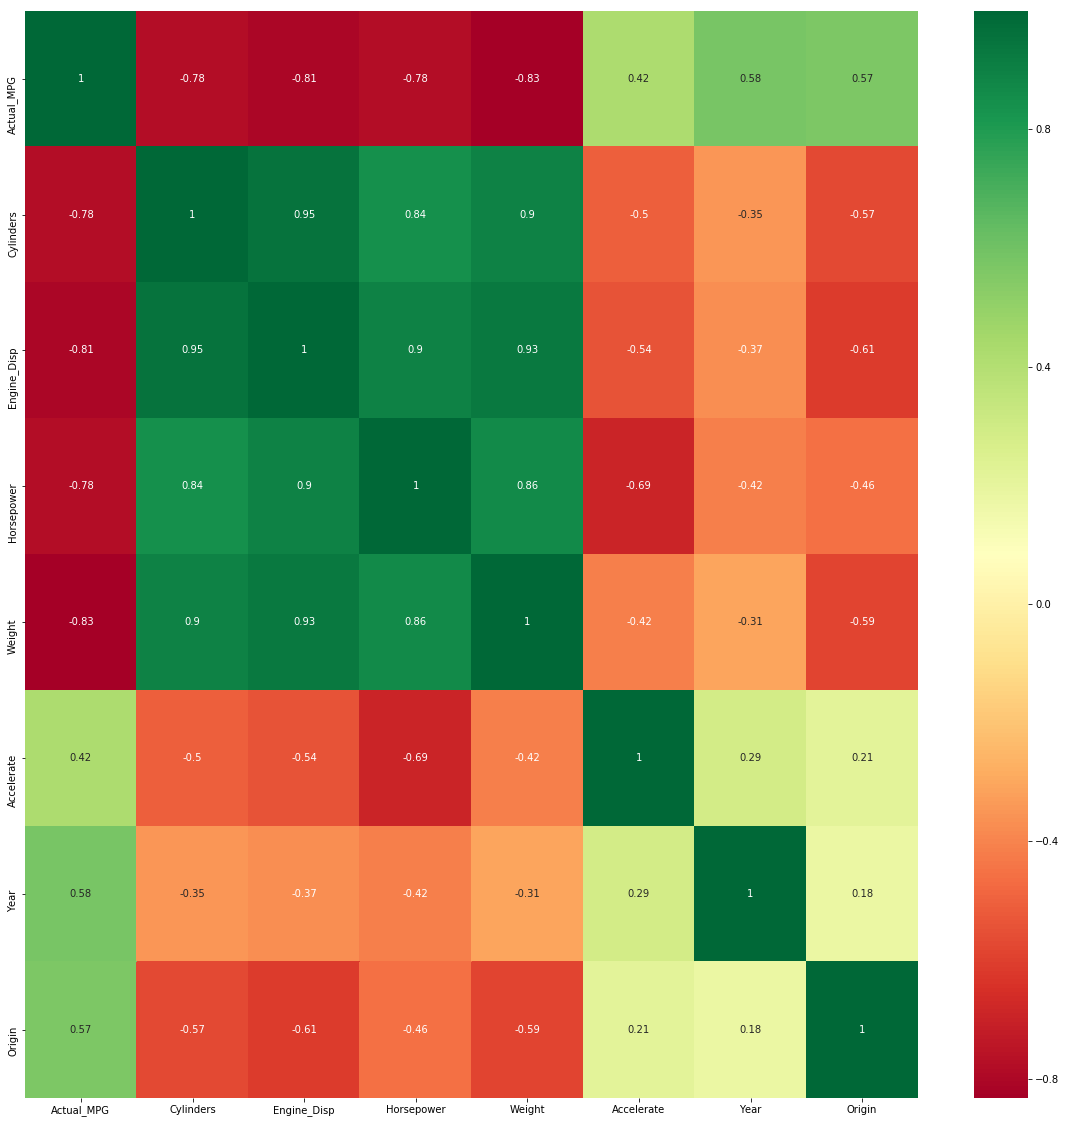

In [34]:
plt.subplots(figsize=(20,20))
sns.heatmap(c, cmap = 'RdYlGn', annot=True)
plt.show();

In [35]:
x=carsDF.loc[:,['Cylinders','Engine_Disp','Horsepower','Weight','Accelerate','Year']]
y=carsDF['Actual_MPG']
x.head()
y.head()

,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year
0,8,390.0,190,3850,8.5,70
1,6,199.0,90,2648,15.0,70
2,6,199.0,97,2774,15.5,70
3,8,304.0,150,3433,12.0,70
4,8,455.0,225,3086,10.0,70


0    15.0
1    21.0
2    18.0
3    16.0
4    14.0
Name: Actual_MPG, dtype: float64

In [36]:
from sklearn.cross_validation import train_test_split 

In [37]:
train_x, test_x, train_y,test_y = train_test_split(x,y, test_size=0.25, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(294, 6)

(98, 6)

(294,)

(98,)

In [38]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
lm.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
predict_test = lm.predict(test_x)

In [42]:
print("RSquare Value for TEST data is -")
np.round(lm.score(test_x,test_y)*100,0)
print("RSquare Value for TRAIN data is -")
np.round(lm.score(train_x,train_y)*100,0)

RSquare Value for TEST data is -


79.0

RSquare Value for TRAIN data is -


82.0

In [43]:
predict_test=lm.predict(test_x)

In [44]:
from sklearn import metrics
print("Mean Sqare Error(MSE) from Test data is")
np.round(metrics.mean_squared_error(test_y,predict_test),0)

Mean Sqare Error(MSE) from Test data is


13.0

In [45]:
fdf=pd.concat([test_x,test_y],1)
fdf['Predicted']=np.round(predict_test,1)
fdf['Prediction_Error']=fdf['Actual_MPG']-fdf['Predicted']
fdf

,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Actual_MPG,Predicted,Prediction_Error
81,4,97.0,88,2100,16.5,72,27.0,26.7,0.3
165,6,225.0,95,3785,19.0,75,18.0,17.5,0.5
351,4,85.0,65,1975,19.4,81,37.0,34.1,2.9
119,4,121.0,112,2868,15.5,73,19.0,22.3,-3.3
379,4,112.0,85,2575,16.2,82,31.0,30.6,0.4
236,6,146.0,97,2815,14.5,77,22.0,24.6,-2.6
78,4,121.0,112,2933,14.5,72,18.0,21.0,-3.0
92,8,350.0,145,3988,13.0,73,13.0,14.6,-1.6
80,3,70.0,97,2330,13.5,72,19.0,25.1,-6.1
333,4,134.0,90,2711,15.5,80,29.8,28.4,1.4


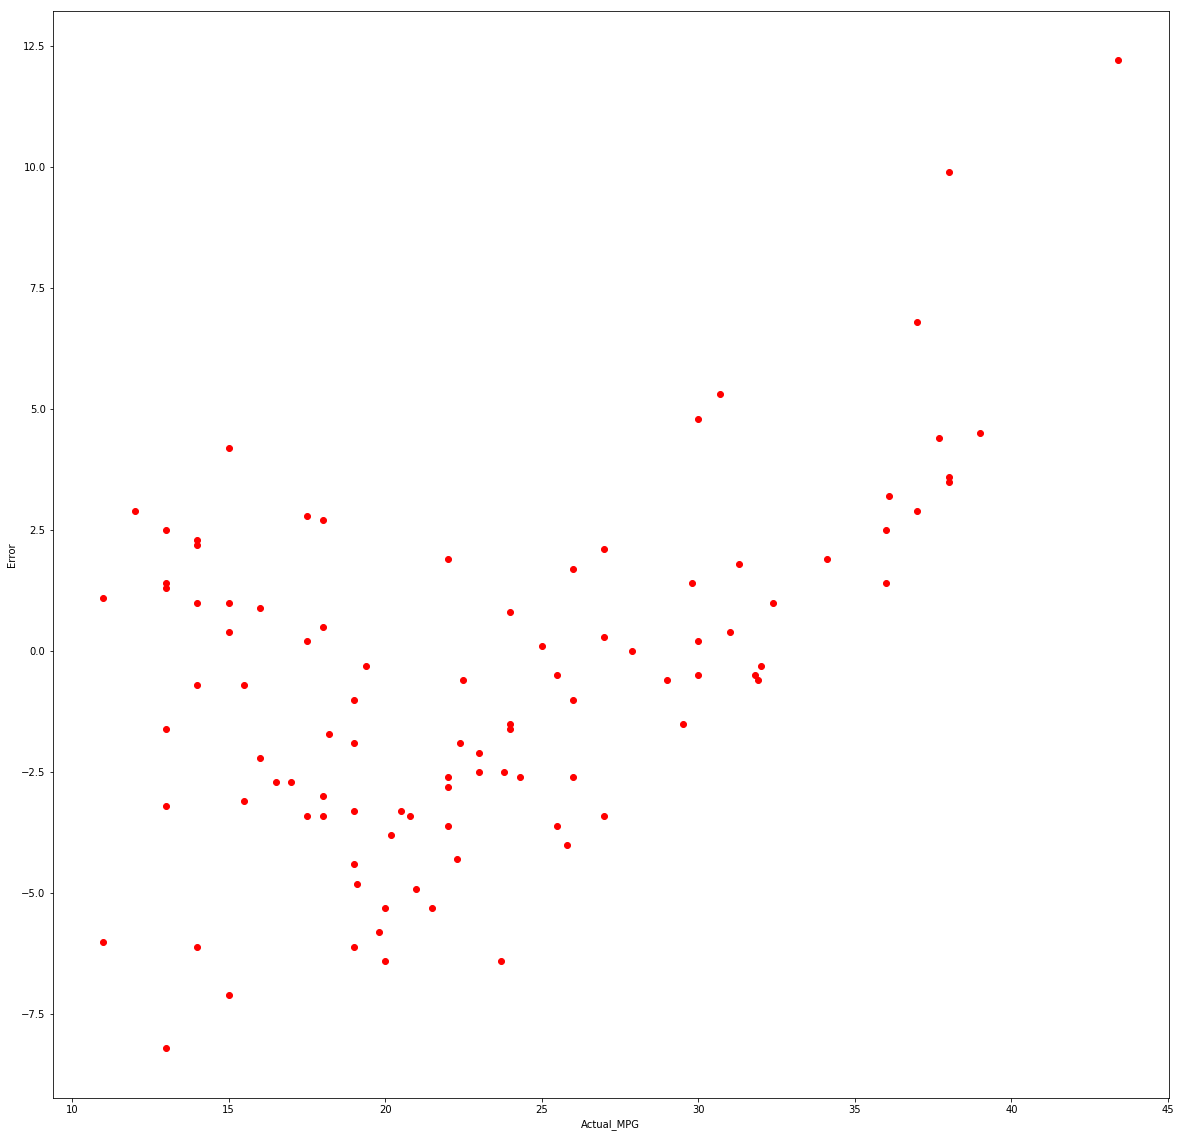

In [46]:
plt.subplots(figsize=(20,20))
plt.scatter(fdf.Actual_MPG,fdf.Prediction_Error,color='red')
plt.xlabel('Actual_MPG')
plt.ylabel('Error')
plt.show();

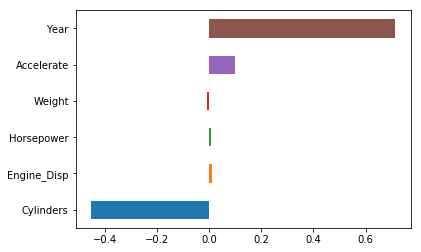

In [47]:
ft_importances=pd.Series(lm.coef_,index=x.columns)
ft_importances.plot(kind='barh')
plt.show;